**ПРОЕКТ 3: О вкусной и здоровой пище**



# ЧТО ВЫ ПОЛУЧИТЕ В РЕЗУЛЬТАТЕ РАБОТЫ?

- Cоздадите свою первую модель, основанную на алгоритмах машинного обучения.
- Примете участие в соревновании на kaggle.
- Поймёте, как правильно «готовить» данные, чтобы ваша модель работала лучше.

# Что нужно сделать?
→ разобраться с подробным описанием того, как будет организовано изучение модуля;

→ зарегистрироваться в соревновании на kaggle;

→ проанализировать baseline к соревнованию;

→ следуя подсказкам в модуле, обработать оставшиеся признаки и подготовить собственное решение;

→ победить в соревновании :)

# Постановка задачи проекта 3:

Представьте, что вы работаете DS в компании TripAdvisor. 

Одна из проблем компании — это нечестные рестораны, которые накручивают себе рейтинг. Одним из способов нахождения таких ресторанов является построение модели, которая предсказывает рейтинг ресторана. 

Если предсказания модели сильно отличаются от фактического результата, то, возможно, ресторан играет нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. 

# ШАГ 1. Разбираемся с данными

**Что мы сделаем на этом шаге?**

→ Посмотрим на данные.

→ Посмотрим, где у нас пропуски.

→ Определим тип признаков.

**На самом деле всё предельно просто:** 

в этом модуле вы будете работать с датасетом, содержащим сведения о 40 000 ресторанах Европы, а модель, которую вы будете обучать, должна будет предсказывать рейтинг ресторана по данным сайта TripAdvisor на основе имеющихся в датасете данных.

**Структура датасета:**

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

**Restaurant_id** — идентификационный номер ресторана / сети ресторанов;

**City** — город, в котором находится ресторан;

**Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

**Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;

**Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

**Price Range** — диапазон цен в ресторане;

**Number of Reviews** — количество отзывов о ресторане;

**Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;

**URL_TA** — URL страницы ресторана на TripAdvisor;

**ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

In [ ]:
# Загрузка библиотек:

import pandas as pd
import numpy as np
import ast
import datetime as dt
import io

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [ ]:
from datetime import datetime, date, time, timedelta
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [ ]:
# Иструмент для кодирования
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
# Загрузка классов из библиотек

from pprint import pprint

pd.set_option('display.max_columns', None)


In [ ]:
# Загрузка датасета размером 40000 записей:

data = pd.read_csv('main_task_new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


# ШАГ 2. Машинное обучение для чайников

**ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ**

Что нужно сделать на этом шаге?
Создать свою первую модель, основанную на алгоритмах машинного обучения. Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно загрузить правильные данные. Приведение данных в нужный вид и будет вашей задачей.

**1 РАЗДЕЛЕНИЕ ДАТАФРЕЙМА**

Прежде всего, для создания модели необходимо разделить датафрейм на набор данных, которые мы будем использовать для обучения модели (), и на целевую переменную, т.е. величину, значение которой мы будем предсказывать ().

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода, входящего в состав библиотеки Scikit-Learn (sklearn). В параметрах метода мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25%, или 0.25.

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
df=data.copy(deep=True)

y = df['Rating'] 
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)  
#y = df['Rating']  

X.info()
print('Размер вектора у=', len(y))

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               40000 non-null  object 
 1   Cuisine Style      30717 non-null  object 
 2   Ranking            40000 non-null  float64
 3   Price Range        26114 non-null  object 
 4   Number of Reviews  37457 non-null  float64
 5   Reviews            40000 non-null  object 
 6   URL_TA             40000 non-null  object 
 7   ID_TA              40000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.4+ MB
Размер вектора у= 40000


**2 СОЗДАНИЕ, ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ**

Сам процесс создания и тестирования модели занимает всего четыре строчки кода (при условии, что мы используем параметры по умолчанию):

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

ValueError: ignored

для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в форматах int или float. 

Есть и ещё одно жёсткое ограничение: в столбцах не должно быть None-значений. В реальных проектах в индустрии используются разные подходы к работе с None-значениями. Если позволяют условия, то строки, содержащие неполные данные, просто удаляют из датасета. 

Однако **в задачах по машинному обучению эта стратегия не используется никогда**, потому что настоящие герои никогда не ищут лёгких путей :) Вместо каждого NaN вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

**! чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий None-значений!**

**На первом этапе**  для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типа object, и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для всего столбца.

**Для выполнения этих операций** вам понадобятся следующие методы библиотеки Pandas:
- **drop** — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля метод разрешается использовать только для удаления столбцов);
- **fillna** — метод для заполнения пропущенных значений в столбце или во всём датафрейме.

In [ ]:
# удалим столбцы, содержащие данные типа object  

X = X.drop(['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)  

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Number of Reviews  37457 non-null  float64
dtypes: float64(2)
memory usage: 625.1 KB


In [ ]:
# заполним пропущенные значения (None или NaN) 
# каким-то одним значением (нулём или средним арифметическим)
# для всего столбца

X = X.fillna(value=0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Number of Reviews  40000 non-null  float64
dtypes: float64(2)
memory usage: 625.1 KB


In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 
y_pred

array([3.  , 3.6 , 3.39, ..., 3.43, 3.82, 4.66])

**КАК УЗНАТЬ, ЧТО МОЯ МОДЕЛЬ ХОРОШАЯ?**

**Для оценки точности прогнозов**, сделанных моделью, мы будем использовать метрику (показатель), которая называется Mean Absolute Error, и представляет собой среднее абсолютное значение отклонения предсказанных значений от фактических:

**Для оценки точности прогнозов**, сделанных моделью, мы будем использовать метрику (показатель), которая называется **Mean Absolute Error**, и представляет собой **среднее абсолютное значение отклонения** предсказанных значений от фактических:

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),2))  

MAE: 0.44


# ШАГ 3. Сделайте с этим что-нибудь!

**ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ**

**Что нужно сделать на этом шаге?**

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных. При подготовке датасета нужно будет не только избавиться от пропущенных (None) значений и нечисловых признаков, но и сгенерировать новые признаки (добавить в датафрейм новые столбцы) на основе информации, уже содержащейся в данных.

**А ЧТО ДЕЛАТЬ-ТО?**

С одной стороны, всё просто. Задачу, которая стоит перед вами, можно свести к трём пунктам:

- Удалить из датафрейма столбцы, данные в которых представлены не числами (это вы уже сделали, и нужно просто повторить знакомые действия, но в этот раз выполнить данный шаг в последнюю очередь).

- Избавиться от пропущенных (None) значений (на предыдущем шаге мы делали это самым грубым из всех возможных способов; сейчас попробуем подойти к процессу более гибко).

- Создать новые столбцы с данными, используя для этого информацию, содержащуюся в других столбцах датафрейма (например, можно добавить столбец, сообщающий, сколько дней прошло со дня публикации последнего отзыва, отображённого на сайте).

⛔ С другой стороны, в этом задании масса подводных камней.

**Строковые данные**

В исходном наборе данных всего три столбца содержат числовые данные, причём один из этих столбцов — это целевая переменная, значение которой должна предсказывать наша модель. Так что просто удалить все object-значения и считать задачу выполненной не получится. Для создания качественной модели нам сначала придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

**Пропущенные значения**

Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Как найти такие данные — большой вопрос, требующий не только знания синтаксиса, но и креативности, изобретательности, хорошего понимания контента, а иногда ещё и интуиции.

**Новые признаки**

Это, пожалуй, самая сложная, но и самая интригующая, увлекательная и творческая часть работы на данном шаге. Создание новых признаков (Feature Engineering) потребует от вас не только хорошего владения разными библиотеками Python, но и способность вникать в контент, умение подключать к работе интуицию, творческий подход и готовность к экспериментам.

**ПОДСКАЗКИ БЕЗ ПОДСКАЗОК**

По условию нашего курса при выполнении этого задания у каждого студента должен получиться свой уникальный датафрейм, содержащий уникальный набор признаков. Иными словами, мы не стремимся привести всех к единому результату и одинаковому «единственно правильному» набору признаков. В то же время у нас есть определённое представление о том, какие признаки точно можно сгенерировать на основе набора данных, который вы получили для работы.

**4.1 Вопросы о ценах**

Сколько вариантов непустых значений встречается в **столбце Price Range**?

In [ ]:
data = pd.read_csv('main_task_new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [ ]:
data['Price Range'].describe() # ответ = 3

count        26114
unique           3
top       $$ - $$$
freq         18412
Name: Price Range, dtype: object

In [ ]:
data['Price Range'].isnull()

0        False
1         True
2        False
3         True
4        False
         ...  
39995    False
39996    False
39997     True
39998    False
39999    False
Name: Price Range, Length: 40000, dtype: bool

**Как в датафрейме обозначается самый низкий уровень цен?**

In [ ]:
data['Price Range'].sort_values(ascending=True).head(2) # ответ = $

28700    $
6930     $
Name: Price Range, dtype: object

**Как в датафрейме обозначается самый высокий уровень цен?**

In [ ]:
data['Price Range'].sort_values(ascending=False).head(2) # ответ = $$$$

20334    $$$$
23990    $$$$
Name: Price Range, dtype: object

**Сколько ресторанов относятся к среднему ценовому сегменту?**

In [ ]:
data['Price Range'].describe() # ответ = 18412

count        26114
unique           3
top       $$ - $$$
freq         18412
Name: Price Range, dtype: object

**4.2 Вопрос о городах**

Сколько городов представлено в наборе данных?

In [ ]:
data['City'].describe() # ответ = 31

count      40000
unique        31
top       London
freq        5757
Name: City, dtype: object

**4.3 Вопросы о кухнях**

Сколько типов кухонь представлено в наборе данных?

In [ ]:
df=data.copy(deep=True)

In [ ]:
df['Cuisine Style'].value_counts().head(5) # ответ = 125

['Italian']               1032
['French']                 805
['Spanish']                695
['French', 'European']     405
['Cafe']                   403
Name: Cuisine Style, dtype: int64

In [ ]:
df.rename(columns={'Cuisine Style':'Cuisine_style'}, inplace=True)
df.head(1)

,Restaurant_id,City,Cuisine_style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643


In [ ]:
# очистка исходного датасета в признаке 'Cuisine Style'
# разделение списков на отдельные строки
# если это сделать, то размерность датасета увеличится
# пока увеличивать размерность не будем

# переименование признака 'Cuisine Style'
# далее
# очистка от символов и разделение на отдельные значения

In [ ]:
# не используем # вариант 1
def clean_name(str_val):
 
    if pd.isna(str_val): return ["Unknown"]
    str_val = str_val.strip('[]')
    str_val = str_val.replace("\'",'')
#    str_val = str_val.replace("(\s+|\s+$)", '')
    str_val = str_val.split(',')
    return str_val

# вызов функции clean_name
# для очистки признака 'Сuisine_style'

df['Cuisine_style'] = df['Cuisine_style'].apply(clean_name)
df['Cuisine_style'].value_counts()

In [ ]:
# не используем #вариант 2
##def cuisine_count(x):
##    try:
##        return len(x.split(','))
##    except:
##        return x

##df['Cuisine_Count'] = df['Cuisine_style'].apply(cuisine_count)
##df['Cuisine_Count'].value_counts()


In [ ]:
# не используем # Вариант 3
df['Cuisine_style'] = df['Cuisine_style'].apply(lambda x: str(x).replace('[', ''))
df['Cuisine_style'] = df['Cuisine_style'].apply(lambda x: str(x).replace(']', ''))
df['Cuisine_style'] = df['Cuisine_style'].apply(lambda x: str(x).replace(' ', ''))

def data_explode(df, col, cnt = False):
    df[col] = df[col].str.split(',')
    df = df.explode(col)
    if cnt:
        return df[col].nunique()#.value_counts()
    return df

df_1 = df.copy()
df_1 = data_explode(df_1, 'Cuisine_style', cnt = True)
df_1

In [ ]:
# ИСПОЛЬЗУЕМ ВАРИАНТ 4

# Вариант 4: даёт верный результат
# но метод explode позволяет сделать только подсчет
# без сохранения результатов в датасете

def to_list(x):
   if pd.isna(x)==True:
       return np.nan
   else:
       x=x.strip("[]")
       x=x.strip(" ")       
       y=x.split(", ")
       return y

df_1 = df.copy(deep=True)
df_1["Cuisine_style"]=df_1["Cuisine_style"].apply(to_list)

print('ответ: ', df_1["Cuisine_style"].explode().nunique())


ответ:  125


**Какая кухня представлена в наибольшем количестве ресторанов? Введите название кухни без кавычек или апострофов.**

In [ ]:
print('ответ: ', df_1["Cuisine_style"].explode().value_counts()) # ответ = Vegetarian Friendly

ответ:  'Vegetarian Friendly'    11189
'European'               10060
'Mediterranean'           6277
'Italian'                 5964
'Vegan Options'           4486
                         ...  
'Burmese'                    1
'Xinjiang'                   1
'Yunnan'                     1
'Latvian'                    1
'Salvadoran'                 1
Name: Cuisine_style, Length: 125, dtype: int64


**Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.**

In [ ]:
grouped_CS = df_1.groupby(['Restaurant_id'])['Cuisine_style'].count().mean()  # ответ = 2.6
display('ответ:', round(grouped_CS,1))


'ответ:'

2.6

**4.4 Вопросы об отзывах**

ЗДЕСЬ создаем фрагмент кода для очистки данных в признаки Reviews (самый "грязный" признак; есть текстовый комментарий, есть даты, в каждой ячейке признака список; т.е. получается  в признаке список с вложенным списком. Да еще не полноценным: в общем, размер вложенного списка должен быть list[0,0,0,0])

**Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.**

In [ ]:
# отображаем формат даты, записанный в признаке Reviews
# типовой формат '11/18/2017', '02/19/2017' mm/dd/yyyy

# [['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]

In [ ]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import ast
import datetime as dt
import io

In [ ]:
from datetime import datetime, date, time, timedelta
from sklearn.model_selection import train_test_split



In [ ]:
# Иструмент для кодирования
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [ ]:
data= pd.read_csv('main_task_new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [ ]:
# делаем копию датасета и работаем далее с копией
# очищаем признак от пробелов
# разделяем на части
# разделителем - знак ","

df_4=data.copy(deep=True)
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643


**ПРИЗНАКИ и ЗНАЧЕНИЯ ПРИЗНАКОВ в ДАТАСЕТЕ:**

Restaurant_id	City	Cuisine Style	Ranking	Rating	Price Range	Number of Reviews	Reviews	URL_TA	ID_TA

0	id_5569	Paris	['European', 'French', 'International']	5570.0	3.5	$$ - $$$	194.0	[['Good food at your doorstep', 'A good hotel ...	/Restaurant_Review-g187147-d1912643-Reviews-R_...	d1912643

In [ ]:
df_4['Reviews'][0]

# '12\/31\/2017', '11\/20\/2017'

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [ ]:
# Пропуски известны, посчитаем кол-во в колонках и после ознакомления с данными решим что делать.

df_4['Reviews'].isnull().sum()

0

In [ ]:
df_4['Reviews'].value_counts()

[[], []]                                                                                          6471
[['ok for beer, not for dinner'], ['12/20/2017']]                                                    2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]       2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]         2
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                              2
                                                                                                  ... 
[['Dinner with the wife', 'Several visits'], ['04/27/2017', '04/24/2017']]                           1
[['Good place for BBQ foods', 'Lovely lunch'], ['12/13/2017', '11/30/2017']]                         1
[['Great for kids', 'Memorable Burger !'], ['10/20/2016', '06/16/2016']]                             1
[['Package deal', 'Good enough.'], ['11/23/2017', '07/22/2013']]         

In [ ]:
type(df_4['Reviews'][1])


str

In [ ]:
df_4['Reviews'] = df_4['Reviews'].fillna('[[], []]')
df_4['NAN_reviews'] = (df_4['Reviews'] == '[[], []]').astype('uint8')

In [ ]:
def processing_reviews(df):
    """
    Функция разбирает строку с комментарием и датой 
    и помещает комментарии и даты в 4 новые колонки 
    2 для комментариев и 2 для дат
    
    """
    
    
    reviews_fb_1 = []
    reviews_fb_2 = []
    reviews_date_1 = []
    reviews_date_2 = []
    
    for index, row in df.iterrows():
        str_review = ast.literal_eval(str(row['Reviews'].replace('nan','0')))   # Разбили строку с комментарием на пополам (комменты/даты)
        
        if str_review == [[], []]:
            reviews_fb_1.append('')
            reviews_fb_2.append('')
            reviews_date_1.append('undefined')
            reviews_date_2.append('undefined')
        else:
            reviews_fb_1.append(str_review[0][0])
            reviews_date_1.append(datetime.strptime(str_review[1][0],'%m/%d/%Y')) 
            if len(str_review[0]) == 1:
                reviews_fb_2.append('')
                reviews_date_2.append('undefined')
            else:
                reviews_fb_2.append(str_review[0][1])
                reviews_date_2.append(datetime.strptime(str_review[1][1],'%m/%d/%Y'))

    df['reviews_fb_1'] = reviews_fb_1
    df['reviews_fb_2'] = reviews_fb_2
    df['date_1'] = reviews_date_1
    df['date_2'] = reviews_date_2


processing_reviews(df_4)

In [ ]:
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,NAN_reviews,reviews_fb_1,reviews_fb_2,date_1,date_2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,Good food at your doorstep,A good hotel restaurant,2017-12-31 00:00:00,2017-11-20 00:00:00


In [ ]:
df_4.date_1.value_counts().tail(10)

2011-07-09 00:00:00    1
2013-12-02 00:00:00    1
2008-06-12 00:00:00    1
2012-02-06 00:00:00    1
2010-03-16 00:00:00    1
2014-06-22 00:00:00    1
2013-08-07 00:00:00    1
2013-12-18 00:00:00    1
2013-08-16 00:00:00    1
2011-10-21 00:00:00    1
Name: date_1, dtype: int64

In [ ]:
df_4.date_2.value_counts().tail(10)

2011-01-20 00:00:00    1
2013-04-26 00:00:00    1
2011-11-02 00:00:00    1
2012-04-06 00:00:00    1
2015-05-07 00:00:00    1
2009-04-19 00:00:00    1
2012-04-26 00:00:00    1
2011-06-23 00:00:00    1
2010-02-14 00:00:00    1
2014-03-19 00:00:00    1
Name: date_2, dtype: int64

# Ответ на задание 4.4.1:

**Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.**

In [ ]:
print(df_4.date_1.dtype,'/', df_4.date_2.dtype)

object / object


In [ ]:
type(df_4.date_1)

pandas.core.series.Series

In [ ]:
df_4.insert(15, "min_date_review",'')
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,NAN_reviews,reviews_fb_1,reviews_fb_2,date_1,date_2,min_date_review
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,Good food at your doorstep,A good hotel restaurant,2017-12-31 00:00:00,2017-11-20 00:00:00,


In [ ]:
# считаем дни: первый и последний для каждой ячейки
# определяем количество дней между отзывами и текущей датой
# определяем ближайшую дату к сегодняшнему дню

for ind in range (len(df_4)):

  day_1=df_4['date_1'][ind]
  day_2=df_4['date_2'][ind]

  if type(df_4['date_1'][ind]) and type(df_4['date_2'][ind]) == datetime:
    if df_4['date_1'][ind] > df_4['date_2'][ind]:
      df_4['min_date_review'][ind]=df_4['date_1'][ind]
    else:
      df_4['min_date_review'][ind]=df_4['date_2'][ind]
  else:
    df_4['min_date_review'][ind]=='undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,NAN_reviews,reviews_fb_1,reviews_fb_2,date_1,date_2,min_date_review
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,Good food at your doorstep,A good hotel restaurant,2017-12-31 00:00:00,2017-11-20 00:00:00,2017-12-31 00:00:00


In [ ]:
# Определим дату ближайшего отзыва

def get_prescription(d1,d2):
    if type(d1) and type(d2) == datetime:
        if d2 > d1:
            max_date = d2
        else:
            max_date = d1
        
        return (datetime.now() - max_date).days
    else:
        return 0

df_4['prescription'] = df_4.apply(lambda x: get_prescription(x['date_1'],x['date_2']),axis=1)

In [ ]:
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,NAN_reviews,reviews_fb_1,reviews_fb_2,date_1,date_2,min_date_review,prescription
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,Good food at your doorstep,A good hotel restaurant,2017-12-31 00:00:00,2017-11-20 00:00:00,2017-12-31 00:00:00,1407


**Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.**

In [ ]:
min_date = df_4.groupby(['prescription'])['min_date_review'].min().head(2)
print('ответ 4.4.1:', min_date)

ответ 4.4.1: prescription
0             NaT
1350   2018-02-26
Name: min_date_review, dtype: datetime64[ns]


# Ответ на задание 4.4.2:

**Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана? Введите количество дней в виде целого числа.**

In [ ]:
df_4.head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,NAN_reviews,reviews_fb_1,reviews_fb_2,date_1,date_2,min_date_review,prescription
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,Good food at your doorstep,A good hotel restaurant,2017-12-31 00:00:00,2017-11-20 00:00:00,2017-12-31 00:00:00,1407


In [ ]:
### Количество дней между отзывами

def get_difference(d1,d2):
    if type(d1) and type(d2) == datetime:
        return (d1-d2).days
    else:
        return 0

df_4['distance_between_reviews'] = df_4.apply(lambda x: get_difference(x['date_1'],x['date_2']),axis=1)


In [ ]:
# сразу посмотрим

df_4['distance_between_reviews'].head(5)

0     41
1    382
2      2
3      0
4    272
Name: distance_between_reviews, dtype: int64

**Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана? Введите количество дней в виде целого числа.**

In [ ]:
print('ответ 4.4.2 (id <кол-во дней>): \n', df_4.distance_between_reviews.sort_values(ascending=False).head(1))

ответ 4.4.2 (id <кол-во дней>): 
 7990    3207
Name: distance_between_reviews, dtype: int64


# Дополнительная работа с признаками:

**Ranking и Number of Reviews**

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Restaurant_id             40000 non-null  object 
 1   City                      40000 non-null  object 
 2   Cuisine Style             30717 non-null  object 
 3   Ranking                   40000 non-null  float64
 4   Rating                    40000 non-null  float64
 5   Price Range               26114 non-null  object 
 6   Number of Reviews         37457 non-null  float64
 7   Reviews                   40000 non-null  object 
 8   URL_TA                    40000 non-null  object 
 9   ID_TA                     40000 non-null  object 
 10  NAN_reviews               40000 non-null  uint8  
 11  reviews_fb_1              40000 non-null  object 
 12  reviews_fb_2              40000 non-null  object 
 13  date_1                    40000 non-null  object 
 14  date_2

**Признак Ranking**

In [ ]:
df_4.Ranking.isnull().sum()

0

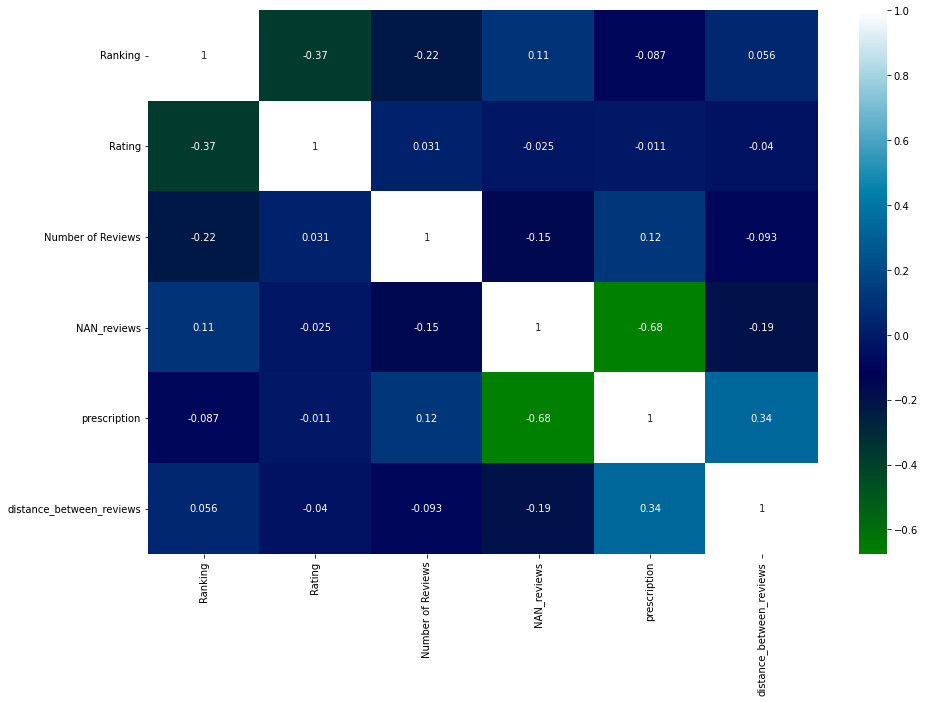

In [ ]:
sns.heatmap(df_4.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

**Признак Number of Reviews**

In [ ]:
df_4['Number of Reviews'].isnull().sum()

2543

# Ответ на задание 4.5:

**Какое значение метрики MAE вам удалось получить на этом этапе?**

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
df_model=df_4.copy(deep=True)

y = df_model['Rating'] 
X = df_model.drop(['Restaurant_id', 'Rating'], axis = 1)  
#y = df_model['Rating']  

X.info()
print('Размер вектора у=', len(y))

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Cuisine Style             30717 non-null  object 
 2   Ranking                   40000 non-null  float64
 3   Price Range               26114 non-null  object 
 4   Number of Reviews         37457 non-null  float64
 5   Reviews                   40000 non-null  object 
 6   URL_TA                    40000 non-null  object 
 7   ID_TA                     40000 non-null  object 
 8   NAN_reviews               40000 non-null  uint8  
 9   reviews_fb_1              40000 non-null  object 
 10  reviews_fb_2              40000 non-null  object 
 11  date_1                    40000 non-null  object 
 12  date_2                    40000 non-null  object 
 13  min_date_review           40000 non-null  object 
 14  prescr

**СОЗДАНИЕ, ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ**
(повторно, после очистки данных)

Сам процесс создания и тестирования модели занимает всего четыре строчки кода (при условии, что мы используем параметры по умолчанию):

In [ ]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Cuisine Style             30717 non-null  object 
 2   Ranking                   40000 non-null  float64
 3   Price Range               26114 non-null  object 
 4   Number of Reviews         37457 non-null  float64
 5   Reviews                   40000 non-null  object 
 6   URL_TA                    40000 non-null  object 
 7   ID_TA                     40000 non-null  object 
 8   NAN_reviews               40000 non-null  uint8  
 9   reviews_fb_1              40000 non-null  object 
 10  reviews_fb_2              40000 non-null  object 
 11  date_1                    40000 non-null  object 
 12  date_2                    40000 non-null  object 
 13  min_date_review           40000 non-null  object 
 14  prescr

In [ ]:
# удалим столбцы, содержащие данные типа object  

X = X.drop(['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'NAN_reviews',
            'reviews_fb_1', 'reviews_fb_2', 'date_1', 'date_2', 'min_date_review'], axis = 1)  

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Number of Reviews         37457 non-null  float64
 2   prescription              40000 non-null  int64  
 3   distance_between_reviews  40000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


In [ ]:
# заполним пропущенные значения (None или NaN) 
# каким-то одним значением (нулём или средним арифметическим)
# для всего столбца

X = X.fillna(value=0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Number of Reviews         40000 non-null  float64
 2   prescription              40000 non-null  int64  
 3   distance_between_reviews  40000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


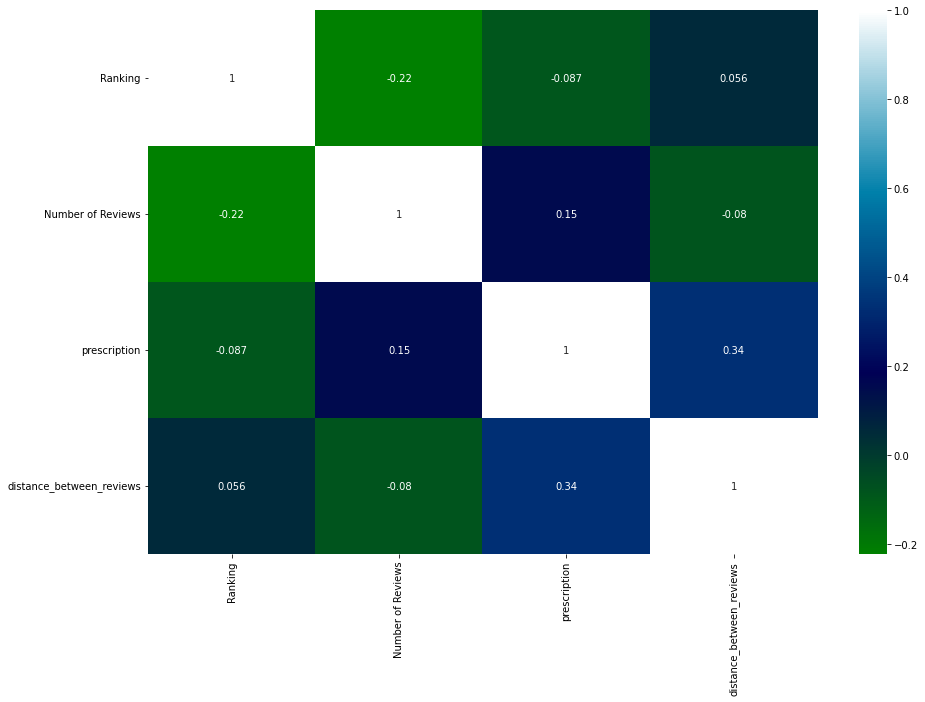

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
# ранг ресторана на основании количества отзывов

X['Ranking_by_reviews'] = X['Ranking'] * X['Number of Reviews']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Number of Reviews         40000 non-null  float64
 2   prescription              40000 non-null  int64  
 3   distance_between_reviews  40000 non-null  int64  
 4   Ranking_by_reviews        40000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.5 MB


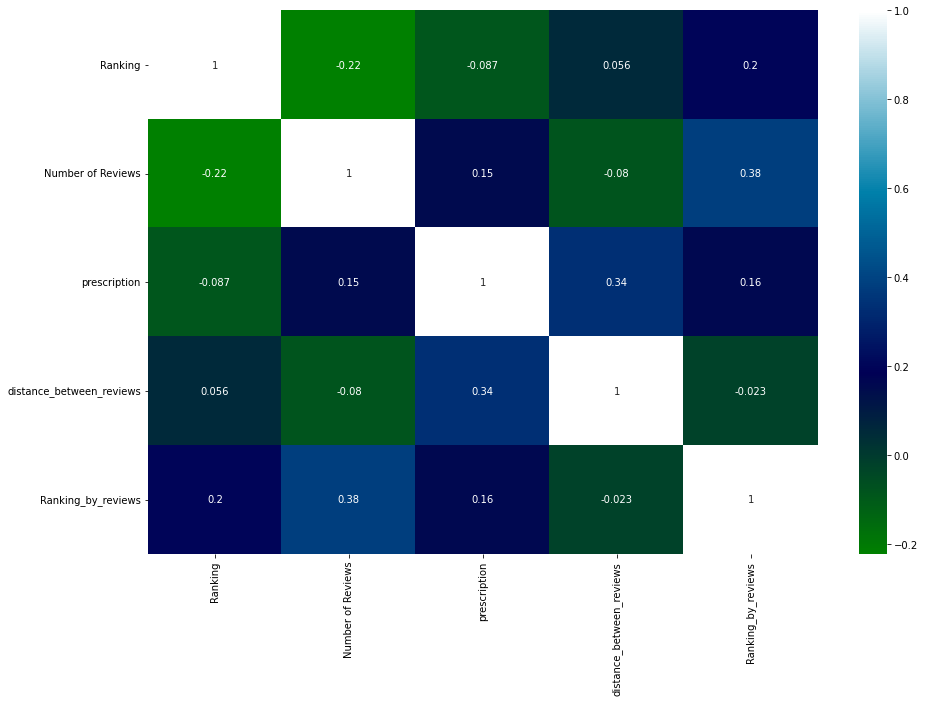

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 
y_pred

array([3.43 , 4.08 , 3.625, ..., 4.965, 4.05 , 4.46 ])

**Ответ на задание 4.5:**

**Какое значение метрики MAE вам удалось получить на этом этапе?**

**КАК УЗНАТЬ, ЧТО МОЯ МОДЕЛЬ ХОРОШАЯ?**

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('ответ на задание 4.5 - MAE:', round(metrics.mean_absolute_error(y_test, y_pred),2))  

ответ на задание 4.5 - MAE: 0.38


**Напишите список не менее чем из пяти признаков, которые вы добавили в датафрейм и дайте краткое пояснение, что означает каждый из признаков.**

1. исходный признак Reviews включает данные о текстовом комментарии посетителей ресторанов и данные о дате, когда был оставлен комментарий. Признак Reviews разделен на 4-е признака: два признака с текстовыми комментариями и два признака с датами

2. исходный признак Cusine Style очищен от лишних символов. Данные в исходном признаке предствалены в виде списка с вложенным списком. Поэтому выполнено разделение вложенного списка на отдельные элементы в пределах строки.

3. исходный признак Ranking и Number of Reviews объединены в новый признак Ranking by Reviews - что позволит оценить, насколько рейтинг ресторана зависит от количества отзывов о нем. Второй признак, который, возможно, оказывает влияние на вновь сформированный признак Ranking by Reviews, - давность оставленного отзыва (Prescription). Предварительный анализ по тепловой карте показывает, что есть взаимосвязь. 

4. ________________
5. ________________
6. ________________

# 5.И снова о чайниках
 
ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ

Что нужно сделать на этом шаге?
Добавить в датафрейм несколько столбцов, содержащих данные особого типа — dummy variables, или фиктивные переменные.
Подобрать такую комбинацию столбцов, которая повысит точность прогноза, сделанного моделью.

**Под категориальным значением** мы будем понимать признак, значения которого означают принадлежность объекта к одной или нескольким категориям. Например, марка автомобиля (одна категория), цвет или цвета (одна или несколько категорий).

*Начинающие исследователи данных при работе с такими признаками часто совершают ошибку, просто заменяя определённые строковые значения признака числовыми показателями. Например, присваивают красному цвету код «1», зелёному — «2», жёлтому — «3» и т.д. Такой подход неверен, так как он предполагает, что объекты красного цвета обладают меньшим значением признака «цвет» по сравнению с зелёными и особенно — жёлтыми, что неверно, по сути.*

*Вторая проблема возникает в ситуации, когда в объекте встречается несколько цветов, например, красный и жёлтый. Какое число может выразить цвет такого объекта? Среднее арифметическое между «красным» и «жёлтым»? То есть объекты, в которых присутствуют красный и жёлтый цвета, на самом деле зелёные? :) Конечно же, это не так.*

**Для перевода категориальных признаков в числовые в машинном обучении довольно часто используется концепция, называемая dummy variables. Суть концепции заключается в том, что для каждой категории признака (в нашем примере — для каждого цвета) создаётся отдельная переменная, которая может быть равна единице, если объект содержит данный цвет и нулю — если нет.**

In [ ]:
df_model=df_4.copy(deep=True)

In [ ]:
df_model.info() # датасет использованной для тестирования модели на второй попытке

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Restaurant_id             40000 non-null  object 
 1   City                      40000 non-null  object 
 2   Cuisine Style             30717 non-null  object 
 3   Ranking                   40000 non-null  float64
 4   Rating                    40000 non-null  float64
 5   Price Range               26114 non-null  object 
 6   Number of Reviews         37457 non-null  float64
 7   Reviews                   40000 non-null  object 
 8   URL_TA                    40000 non-null  object 
 9   ID_TA                     40000 non-null  object 
 10  NAN_reviews               40000 non-null  uint8  
 11  reviews_fb_1              40000 non-null  object 
 12  reviews_fb_2              40000 non-null  object 
 13  date_1                    40000 non-null  object 
 14  date_2

In [ ]:
y3 = df_model['Rating'] 
X3 = df_model.drop(['Restaurant_id', 'Rating'], axis = 1)  
#y = df_model['Rating'] 

X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Cuisine Style             30717 non-null  object 
 2   Ranking                   40000 non-null  float64
 3   Price Range               26114 non-null  object 
 4   Number of Reviews         37457 non-null  float64
 5   Reviews                   40000 non-null  object 
 6   URL_TA                    40000 non-null  object 
 7   ID_TA                     40000 non-null  object 
 8   NAN_reviews               40000 non-null  uint8  
 9   reviews_fb_1              40000 non-null  object 
 10  reviews_fb_2              40000 non-null  object 
 11  date_1                    40000 non-null  object 
 12  date_2                    40000 non-null  object 
 13  min_date_review           40000 non-null  object 
 14  prescr

In [ ]:
X3['Ranking_by_reviews'] = X3['Ranking'] * X3['Number of Reviews']
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Cuisine Style             30717 non-null  object 
 2   Ranking                   40000 non-null  float64
 3   Price Range               26114 non-null  object 
 4   Number of Reviews         37457 non-null  float64
 5   Reviews                   40000 non-null  object 
 6   URL_TA                    40000 non-null  object 
 7   ID_TA                     40000 non-null  object 
 8   NAN_reviews               40000 non-null  uint8  
 9   reviews_fb_1              40000 non-null  object 
 10  reviews_fb_2              40000 non-null  object 
 11  date_1                    40000 non-null  object 
 12  date_2                    40000 non-null  object 
 13  min_date_review           40000 non-null  object 
 14  prescr

# Вводим Dummy Variables
для признаков:

- City (город, страна)
- Price Range (высокий, средний, низкий (бюджетный))
- Reviews (для новых признаков - reviews_fb_1, reviews_fb_2) (хороший, плохой)



In [ ]:
# удалим столбцы, содержащие данные типа object  

X3 = X3.drop(['Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'NAN_reviews',
              'date_1', 'date_2', 'min_date_review'], axis = 1)  

X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               26114 non-null  object 
 3   Number of Reviews         37457 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        37457 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
# заполним пропущенные значения (None или NaN) 
# каким-то одним значением (нулём или средним арифметическим)
# для всего столбца

X3 = X3.fillna(value=0)
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
df_5=X3.copy(deep=True)

# АНАЛИЗИРУЕМ оставшиеся признаки 
# для НОВОЙ МОДЕЛИ

In [ ]:
# признак City

df_5.City.value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [ ]:
# Определим признак Country
# который будет отражать популярность ресторанов 
# для посещения населением (местные жители и туристы; 
# сделать различие между ними по данному датасету не представляется возможным)

# c Kaggle из BaseLine
# берем датасет, включающий пару "город"-"страна"


# принадлежность к стране
city_of_country = {
    'London': 'United Kingdom',
    'Paris': 'France',
    'Madrid': 'Spain',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Milan': 'Italy',
    'Rome': 'Italy',
    'Prague': 'Czech Republic',
    'Lisbon': 'Portugal',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Brussels': 'Belgium',
    'Hamburg': 'Germany',
    'Munich': 'Germany',
    'Lyon': 'France',
    'Stockholm': 'Sweden',
    'Budapest': 'Hungary',
    'Warsaw': 'Poland',
    'Dublin': 'Ireland',
    'Copenhagen': 'Denmark',
    'Athens': 'Greece',
    'Edinburgh': 'United Kingdom',
    'Zurich': 'Switzerland',
    'Oporto': 'Portugal',
    'Geneva': 'Switzerland',
    'Krakow': 'Poland',
    'Oslo': 'Norway',
    'Helsinki': 'Finland',
    'Bratislava': 'Slovak Republic',
    'Luxembourg': 'Luxembourg',
    'Ljubljana': 'Slovenia'
}

city_of_country

{'Amsterdam': 'Netherlands',
 'Athens': 'Greece',
 'Barcelona': 'Spain',
 'Berlin': 'Germany',
 'Bratislava': 'Slovak Republic',
 'Brussels': 'Belgium',
 'Budapest': 'Hungary',
 'Copenhagen': 'Denmark',
 'Dublin': 'Ireland',
 'Edinburgh': 'United Kingdom',
 'Geneva': 'Switzerland',
 'Hamburg': 'Germany',
 'Helsinki': 'Finland',
 'Krakow': 'Poland',
 'Lisbon': 'Portugal',
 'Ljubljana': 'Slovenia',
 'London': 'United Kingdom',
 'Luxembourg': 'Luxembourg',
 'Lyon': 'France',
 'Madrid': 'Spain',
 'Milan': 'Italy',
 'Munich': 'Germany',
 'Oporto': 'Portugal',
 'Oslo': 'Norway',
 'Paris': 'France',
 'Prague': 'Czech Republic',
 'Rome': 'Italy',
 'Stockholm': 'Sweden',
 'Vienna': 'Austria',
 'Warsaw': 'Poland',
 'Zurich': 'Switzerland'}

In [ ]:
# сделаем дополнительную разметку в датасете с городами-странами
# добавим dummy variables - "Принадлежность к города к стране":

country_of_country = {
    'United Kingdom': 1,
    'France': 2,
    'Spain': 3,
    'Germany': 4,
    'Italy': 5,
    'Czech Republic': 6,
    'Portugal': 7,
    'Austria': 8,
    'Netherlands': 9,
    'Belgium': 10,
    'Sweden': 11,
    'Hungary': 12,
    'Poland': 13,
    'Ireland': 14,
    'Denmark': 15,
    'Greece': 16,
    'Switzerland': 17,
    'Norway': 18,
    'Finland': 19,
    'Slovak Republic': 20,
    'Luxembourg': 21,
    'Slovenia': 22
}



country_of_country

{'Austria': 8,
 'Belgium': 10,
 'Czech Republic': 6,
 'Denmark': 15,
 'Finland': 19,
 'France': 2,
 'Germany': 4,
 'Greece': 16,
 'Hungary': 12,
 'Ireland': 14,
 'Italy': 5,
 'Luxembourg': 21,
 'Netherlands': 9,
 'Norway': 18,
 'Poland': 13,
 'Portugal': 7,
 'Slovak Republic': 20,
 'Slovenia': 22,
 'Spain': 3,
 'Sweden': 11,
 'Switzerland': 17,
 'United Kingdom': 1}

In [ ]:
# создаём колонку со странами

df_5['Country'] = df_5['City'].map(city_of_country)

df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
 9   Country                   40000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.1+ MB


In [ ]:
df_5.Country.value_counts(ascending=False).head(22)

United Kingdom     6353
Spain              5842
France             5789
Italy              4211
Germany            3997
Portugal           1813
Czech Republic     1443
Poland             1170
Austria            1166
Netherlands        1086
Belgium            1060
Switzerland        1019
Sweden              820
Hungary             816
Ireland             673
Denmark             659
Greece              628
Norway              385
Finland             376
Slovak Republic     301
Luxembourg          210
Slovenia            183
Name: Country, dtype: int64

In [ ]:
# создаём колонку с признаком "Популярность стран по городам"

df_5['Country_popularity'] = df_5['Country'].map(country_of_country)

df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
 9   Country                   40000 non-null  object 
 10  Country_popularity        40000 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.4+ MB


In [ ]:
# Рейтинг стран 
# (по количеству городов, в которых есть рестораны, в которых были посетители)

df_5.groupby(['Country_popularity','Country'])['City'].count().sort_values(ascending=False)


Country_popularity  Country        
1                   United Kingdom     6353
3                   Spain              5842
2                   France             5789
5                   Italy              4211
4                   Germany            3997
7                   Portugal           1813
6                   Czech Republic     1443
13                  Poland             1170
8                   Austria            1166
9                   Netherlands        1086
10                  Belgium            1060
17                  Switzerland        1019
11                  Sweden              820
12                  Hungary             816
14                  Ireland             673
15                  Denmark             659
16                  Greece              628
18                  Norway              385
19                  Finland             376
20                  Slovak Republic     301
21                  Luxembourg          210
22                  Slovenia            

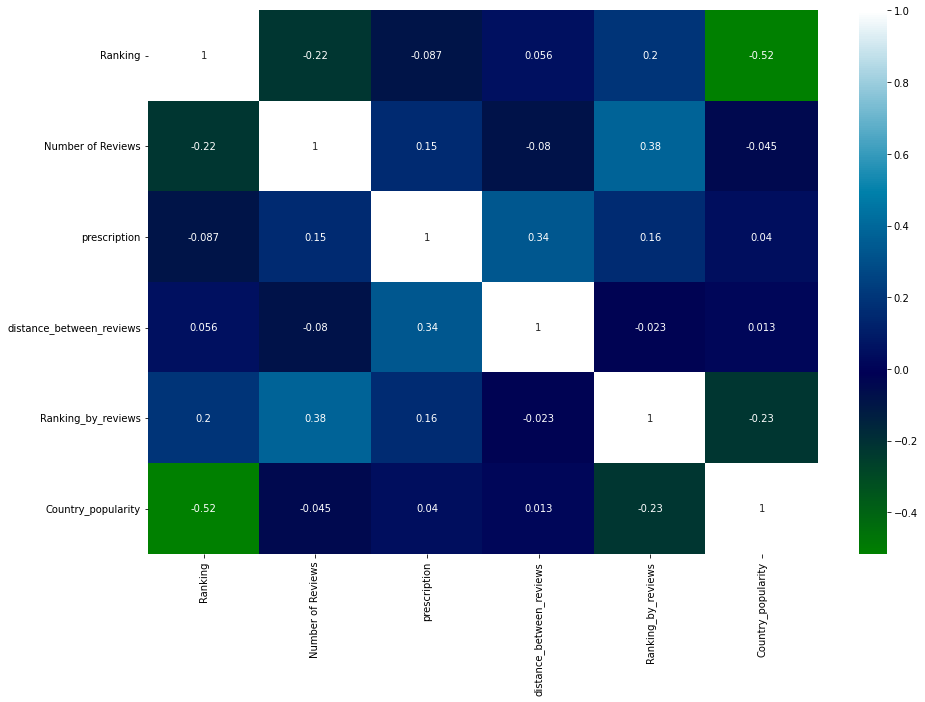

In [ ]:
sns.heatmap(df_5.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
# признак Price Range

df_5[df_5['Price Range']=='$$$$'].value_counts()

City       Ranking  Price Range  Number of Reviews  reviews_fb_1               reviews_fb_2                                   prescription  distance_between_reviews  Ranking_by_reviews  Country         Country_popularity
Zurich     1535.0   $$$$         13.0               Read the prices carefully  Expensive                                      1558          -67                       19955.0             Switzerland     17                    1
London     43.0     $$$$         1263.0             Perfect                    Xmas dinner at Claridge's wonderful exper...   1402           9                        54309.0             United Kingdom  1                     1
           298.0    $$$$         2141.0             Adore this place           Delicious, but would have been better with...  1399           4                        638018.0            United Kingdom  1                     1
           302.0    $$$$         286.0              Splendour re-created       Fantastic "outside the

In [ ]:
#groupby(['Country_popularity','Country'])['City'].count().sort_values(ascending=False)
df_5.groupby(['Country','City'])['Price Range'].describe()

count unique       top  freq
Country         City                                   
Austria         Vienna      1166      4  $$ - $$$   538
Belgium         Brussels    1060      4  $$ - $$$   513
Czech Republic  Prague      1443      4  $$ - $$$   590
Denmark         Copenhagen   659      4  $$ - $$$   330
Finland         Helsinki     376      4  $$ - $$$   184
France          Lyon         892      4         0   421
                Paris       4897      4  $$ - $$$  2501
Germany         Berlin      2155      4         0  1009
                Hamburg      949      4         0   517
                Munich       893      4  $$ - $$$   432
Greece          Athens       628      4  $$ - $$$   275
Hungary         Budapest     816      4  $$ - $$$   353
Ireland         Dublin       673      4  $$ - $$$   369
Italy           Milan       2133      4         0   851
                Rome        2078      4  $$ - $$$  1041
Luxembourg      Luxembourg   210      4  $$ - $$$   128
Netherlands     Amsterdam   1086      4  $$ - $$$   644
Norway          Oslo         385      4  $$ - $$$   196
Poland          Krakow       443      4  $$ - $$$   178
                Warsaw       727      4  $$ - $$$   299
Portugal        Lisbon      1300      4  $$ - $$$   562
                Oporto       513      4  $$ - $$$   208
Slovak Republic Bratislava   301      4         0   161
Slovenia        Ljubljana    183      4  $$ - $$$    86
Spain           Barcelona   2734      4  $$ - $$$  1229
                Madrid      3108      4         0  1370
Sweden          Stockholm    820      4         0   380
Switzerland     Geneva       481      4  $$ - $$$   263
                Zurich       538      4  $$ - $$$   293
United Kingdom  Edinburgh    596      4  $$ - $$$   319
                London      5757      4  $$ - $$$  2908

In [ ]:
# создаем новый признак 
# на основе Price Range
# учитываем, что есть четыре диапазона оценки
# "0" - низкий уровень или неопределен статус ресторана (без звезд) = 0
# "$" - уровень 1 (одна звезда) = 1
# "$$ - $$$" - уровень 2-3 (две-три звезды) = 2
# "$$$$" - уровень 4 (четыре звезды) = 4

price_range_dict = {'0': 0, '$': 1, '$$ - $$$': 2, '$$$$': 3}
df_5['Price_Rating'] = df_5['Price Range'].map(price_range_dict)

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
 9   Country                   40000 non-null  object 
 10  Country_popularity        40000 non-null  int64  
 11  Price_Rating              26114 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 3.7+ MB


In [ ]:
df_5['Price_Rating'].isna().sum()

13886

In [ ]:
df_5['Price_Rating'].sort_values(ascending=True)

28700    1.0
6930     1.0
25414    1.0
6927     1.0
15396    1.0
        ... 
39988    NaN
39989    NaN
39990    NaN
39993    NaN
39997    NaN
Name: Price_Rating, Length: 40000, dtype: float64

In [ ]:
# заполняем пропуски
# формируем группу "0"

df_5['NAN_price_range'] = pd.isna(df_5['Price_Rating']).astype('uint8')
df_5['Price_Rating'].fillna(df_5['Price_Rating'].mean(), inplace=True)

# на Kaggle этот код отсутствует, т.к. сделано заполнение значением "0"
# для всех ячеек с Nan

In [ ]:
df_5['Price_Rating'].head()

0    2.000000
1    1.814046
2    3.000000
3    1.814046
4    2.000000
Name: Price_Rating, dtype: float64

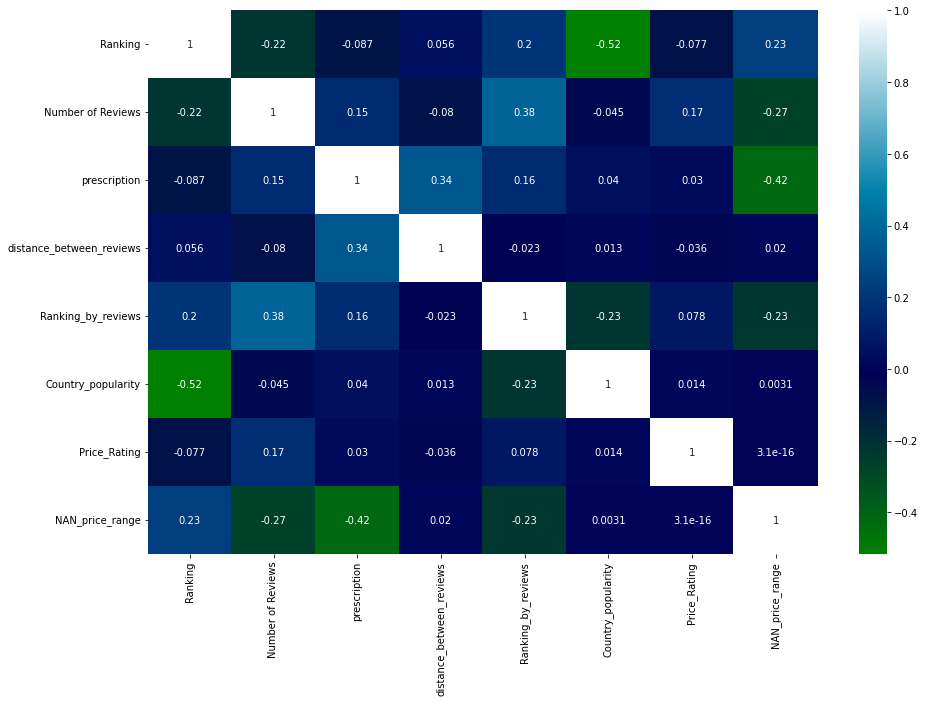

In [ ]:
sns.heatmap(df_5.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
 9   Country                   40000 non-null  object 
 10  Country_popularity        40000 non-null  int64  
 11  Price_Rating              40000 non-null  float64
 12  NAN_price_range           40000 non-null  uint8  
dtypes: float64(4), int64(3), object(5), uint8(1)
memory usage: 3.

In [ ]:
# признак reviews_fb_1 и reviews_fb_2

df_5.reviews_fb_1.value_counts().head(5)

              6471
Excellent      118
Good food      107
Great food      85
Delicious       75
Name: reviews_fb_1, dtype: int64

In [ ]:
# словарь слов - хорошие комментарии
# расширен словарь хороших комментариев

good_reviews = [
    'very',
    'good',
    'nice',
    'amazing',
    'great',
    'best',
    'loved',
    'exellent',
    'a.m.a.z.i.n.g',
    'lovely',
    'love',
    'top',
    'fast',
    'super',
    'delicious',
    'beautiful',
    'fabulous',
    'wonderful',
    'brilliant',
    'not bad',
    'enjoyable',
    'fantastic',
    'yummy',
    'perfect',
    'tasty',
    'awesome',
    'hidden gem',
    'just ok',
    'outstanding',
    'wow',
    'friendly',
    'welcoming',
    'ideal'
            ]

good_reviews

In [ ]:
df_5.reviews_fb_2.value_counts().head(5)

In [ ]:
# словарь слов - плохие комментарии
# расширен словарь плохих комментариев

bad_reviews = [
    'slow',
    'bad', 
    'small',
    'missed',
    'low',
    'busy',
    'nightmare',
    'overrated',
    'worst',
    'nothing special',
    'hidden gem',
    'average',
    'disappointing',
    'below average'
            ]

bad_reviews

In [ ]:
# определение хороших и плохих отзывов
# (функция взята из baseline на Kaggle)

def get_reviews(row, reviews, good_bad):
    
    # строка дс, список слов, признак отзыва
    
    if row != str:
        return 0
    for rev in reviews:
        if rev.lower() in row.lower():
            return (good_bad)
        else:
            return 0

In [ ]:
# считаем хорошие комменты

df_5['good_reviews'] = df_5['reviews_fb_1'].apply(lambda x: get_reviews(x, good_reviews, 2))
df_5['good_reviews'] = df_5['reviews_fb_2'].apply(lambda x: get_reviews(x, good_reviews, 2))

In [ ]:
df_5.good_reviews.describe()

In [ ]:
# считаем плохие комменты

df_5['bad_reviews'] = df_5['reviews_fb_1'].apply(lambda x: get_reviews(x, bad_reviews, 1))
df_5['bad_reviews'] = df_5['reviews_fb_2'].apply(lambda x: get_reviews(x, bad_reviews, 1))

In [ ]:
df_5.bad_reviews.describe()

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      40000 non-null  object 
 1   Ranking                   40000 non-null  float64
 2   Price Range               40000 non-null  object 
 3   Number of Reviews         40000 non-null  float64
 4   reviews_fb_1              40000 non-null  object 
 5   reviews_fb_2              40000 non-null  object 
 6   prescription              40000 non-null  int64  
 7   distance_between_reviews  40000 non-null  int64  
 8   Ranking_by_reviews        40000 non-null  float64
 9   Country                   40000 non-null  object 
 10  Country_popularity        40000 non-null  int64  
 11  Price_Rating              40000 non-null  float64
 12  NAN_price_range           40000 non-null  uint8  
 13  good_reviews              40000 non-null  int64  
 14  bad_re

**Новые признаки good_reviews и bad_reviews**
оказались пустыми
как их исправить и заполнить значением признака отзыва (хороший/плохой) - пока не знаю.

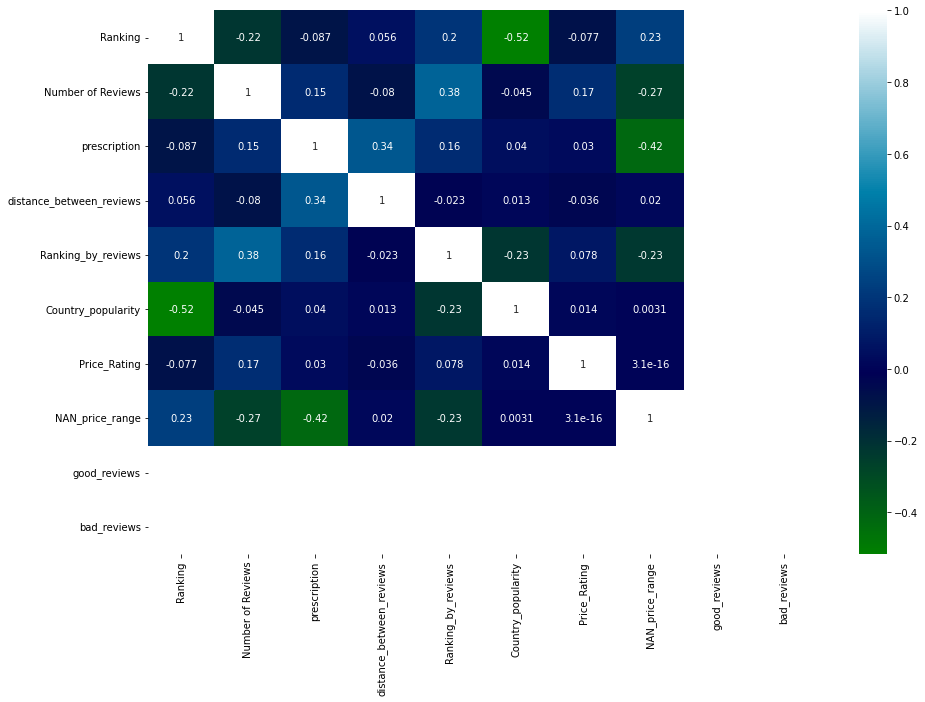

In [ ]:
sns.heatmap(df_5.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

**Дорабатываем города: создаем для них отдельные столбцы**
для того, чтобы ввести значения dummy variables - "0" и "1"

In [ ]:
# закодируем данные о городах и странах

le = LabelEncoder()

le.fit(df_5['Country'])
df_5['country_cod'] = le.transform(df_5['Country'])

le.fit(df_5['City'])
df_5['city_cod'] = le.transform(df_5['City'])


In [ ]:
# разобъём города дополнительно на колонки

df_5 = pd.get_dummies(df_5, columns=['City',], dummy_na=True)

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Price Range               40000 non-null  object 
 2   Number of Reviews         40000 non-null  float64
 3   reviews_fb_1              40000 non-null  object 
 4   reviews_fb_2              40000 non-null  object 
 5   prescription              40000 non-null  int64  
 6   distance_between_reviews  40000 non-null  int64  
 7   Ranking_by_reviews        40000 non-null  float64
 8   Country                   40000 non-null  object 
 9   Country_popularity        40000 non-null  int64  
 10  Price_Rating              40000 non-null  float64
 11  NAN_price_range           40000 non-null  uint8  
 12  good_reviews              40000 non-null  int64  
 13  bad_reviews               40000 non-null  int64  
 14  countr

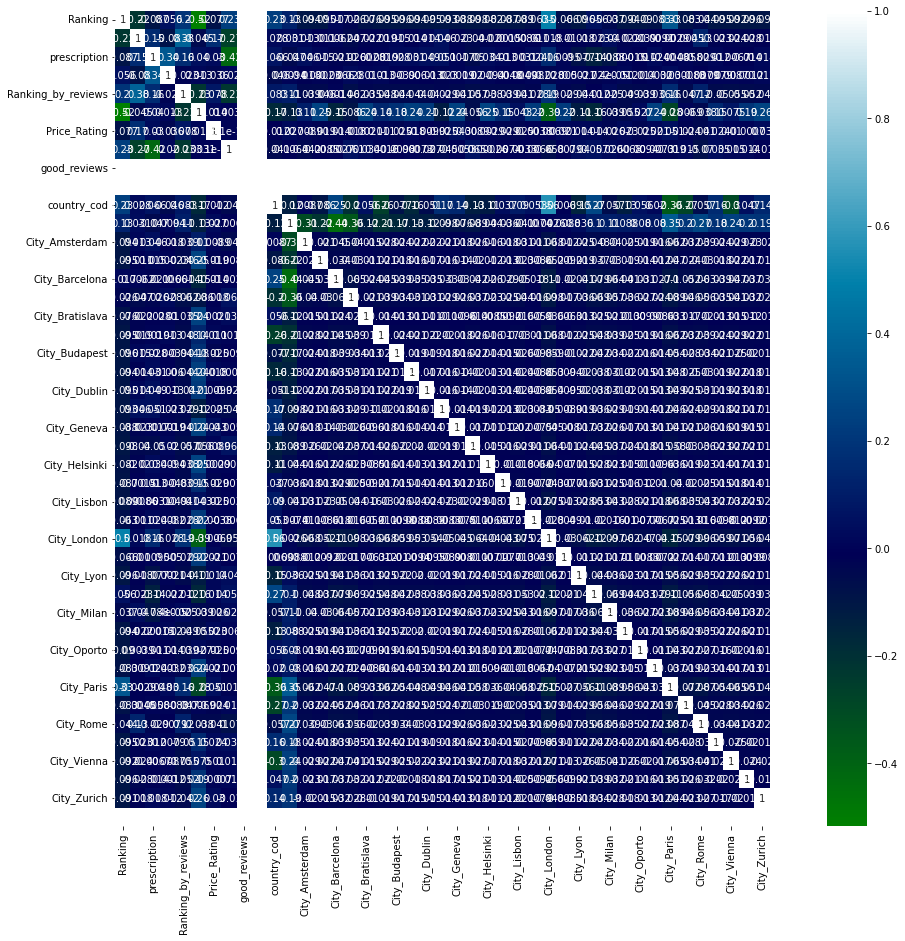

In [ ]:
# Посмотрим распределение признака

sns.heatmap(df_5.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 15)

In [ ]:
df_train=df_5

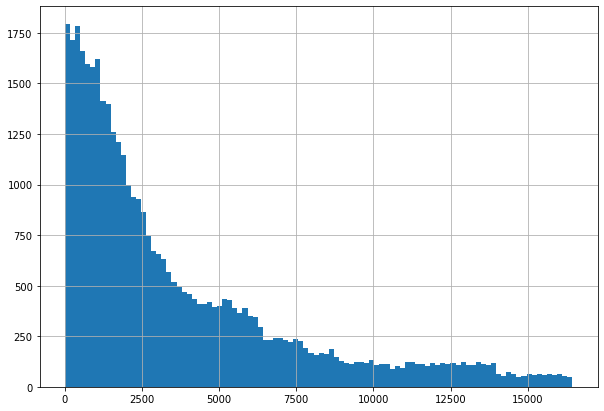

In [ ]:
# Посмотрим распределение признака

plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

In [ ]:
# целевая переменная
# y_train

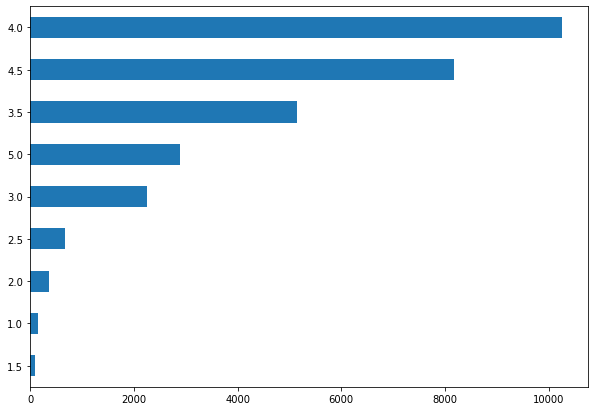

In [ ]:
# Посмотрим распределение целевой переменной

y_train.value_counts(ascending=True).plot(kind='barh')

In [ ]:
df_6=df_5.copy(deep=True)

# ВЫВОД по новым параметрам 

# DUMMY VARIABLES (введены для признаков City, Price range, Reviews (для этого признака неудачно))

- bad_reviews - определяют количество плохих комментариев (не удалось корректно посчитать)
- good_reviews - определяют количество хороших комментариев (не удалось корректно посчитать)
- NAN_price_range - 
- Price_Rating - оценивает ценовые категории, к которым относится ресторан; информативный параметр
- Country_popularity - данный параметр оценивает пополуярность страны в целом. Параметр обобщенный, т.к. он зависит от покупательской способности, от бюджетности стоимости, от доступности и привлекательности ресторанов и т.п.
- Ranking_by_reviews - параметр определяющий рейтинг ресторанов по комментарию.


# Расчет по НОВОЙ МОДЕЛИ (третья модель)

In [ ]:
X_6 = df_6.drop(['Price Range', 'reviews_fb_1', 'reviews_fb_2','Country'], axis = 1)  

X_6.info()

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
df_model=X_6.copy(deep=True)

y = df_4['Rating'] 
X = df_model 

X.info()
print('Размер вектора у=', len(y))

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ranking                   40000 non-null  float64
 1   Number of Reviews         40000 non-null  float64
 2   prescription              40000 non-null  int64  
 3   distance_between_reviews  40000 non-null  int64  
 4   Ranking_by_reviews        40000 non-null  float64
 5   Country_popularity        40000 non-null  int64  
 6   Price_Rating              40000 non-null  float64
 7   NAN_price_range           40000 non-null  uint8  
 8   good_reviews              40000 non-null  int64  
 9   bad_reviews               40000 non-null  int64  
 10  country_cod               40000 non-null  int64  
 11  city_cod                  40000 non-null  int64  
 12  City_Amsterdam            40000 non-null  uint8  
 13  City_Athens               40000 non-null  uint8  
 14  City_B

In [ ]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

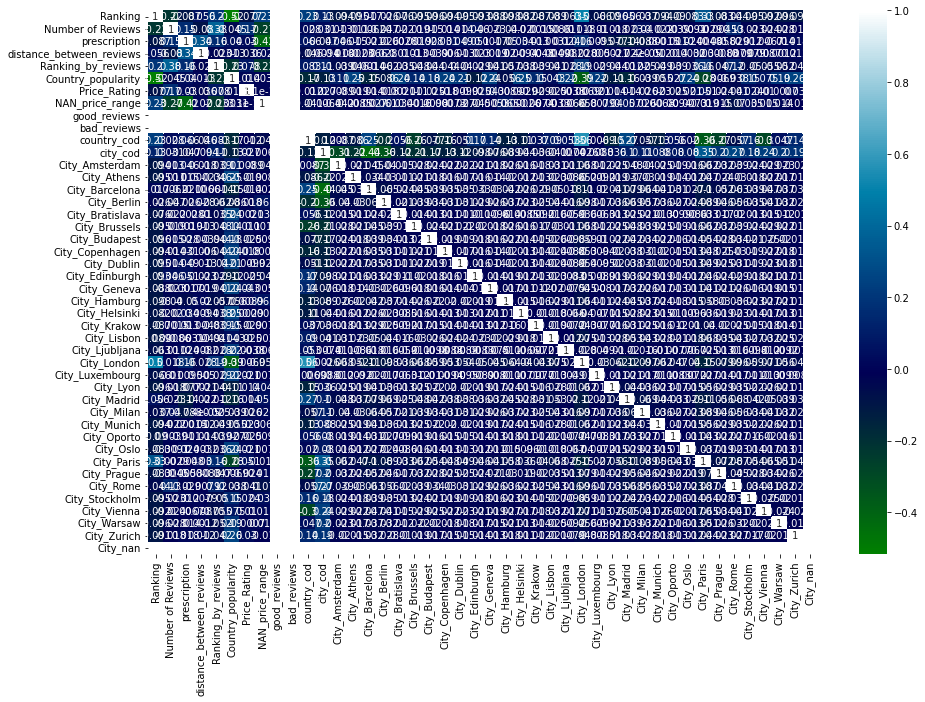

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 
y_pred

array([4.585, 4.42 , 4.135, ..., 3.195, 3.58 , 3.77 ])

**Ответ на задание 5.1:**

**Какое значение метрики MAE вам удалось получить на этом этапе?**

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('ответ на задание 5.1 - MAE:', round(metrics.mean_absolute_error(y_test, y_pred),2))  

ответ на задание 5.1 - MAE: 0.21


# 6.Kaggle. Начало

ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ

Что нужно сделать на этом шаге?
- узнать, что такое Kaggle и зачем он нужен;
- зарегистрироваться на Kaggle.com (желательно под таким же ником, как и в Слаке);
- разобраться, как работать с kaggle notebooks;
- отправить свой первый submit.


В этом соревновании вам будет предложен датасет, содержащий сведения о ресторанах. С помощью имеющего в вашем распоряжении кода, вам необходимо создать модель, использующую алгоритм RandomForestRegression, которая будет прогнозировать рейтинг ресторана по версии TripAdvidor.

Для победы в конкурсе вам необходимо качественно очистить датасет, подобрать подходящие значения для заполнения пропусков и создать новые признаки на основе той информации, которую вы сможете извлечь из имеющихся в вашем распоряжении данных.

Условия соревнования:
Все участники должны использовать один и тот же алгоритм с параметрами, заданными по умолчанию.
Разрешено использовать внешние данные.
Решения буду проверяться преподавателями на их адекватность и воспроизводимость.
Во вкладке Notebooks этого соревнования для Вас доступно Базовое решение (Baseline)

https://www.kaggle.com/c/sf-dst-restaurant-rating